#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [71]:
import numpy as np
from itertools import product

import matplotlib.pyplot as plt
import time
import random

In [72]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [76]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity


  def solve_knapsack_brute_force(self):
    dane = [0, 1]
    max_profit = 0
    productSet = product(dane, repeat = len(self.weights))

    for element in productSet:
      profit = 0
      weight = 0
      for index in range(len(element)):
        sum = element[index] * self.weights[index]
        weight += sum
        res = element[index] * self.profits[index]
        profit += res

      if(weight <= self.capacity and profit >= max_profit):
        max_profit = profit
        indexes = [i for i in range(len(element)) if element[i] == 1]
    return indexes
        

  def solve_knapsack_pw_ratio(self):
    ratios = []
    for p, w, i in zip(self.profits, 
                       self.weights, 
                       range(len(self.weights))
                       ):
        ratios.append( (p/w, i) )
    ratios.sort(reverse = True)

    sum = 0
    i = 0
    indexes = []

    while(sum + self.weights[ratios[i][1]] <= self.capacity):
        index = ratios[i][1]
        sum += self.weights[index]
        indexes.append(index)
        i += 1
    return indexes


  def format(self, indexes):
    indexes.sort()
    print([el for el in indexes])


In [80]:
def calc_time(profits, weights, capacity):
    i = KnapSack(profits, weights, capacity)
    time1 = time.time()
    i.solve_knapsack_brute_force()
    time2 = time.time()
    return time2 - time1

def calc_average_time(howMany):
    times = 0
    for i in range(10):
        randomProfits = random.sample(range(1, 30), howMany)
        randomWeights = random.sample(range(1, 30), howMany)
        randomCapacity = random.randint(1, 30)
        time = calc_time(randomProfits, randomWeights, randomCapacity)
        times += time
    times /=  10
    return times

Solution of knapsack brute force algorithm: 
[1, 2]

Solution of knapsack pw ratio algorithm: 
[1, 3]


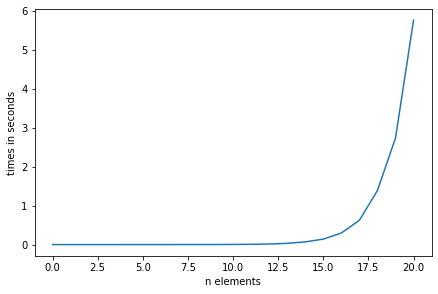

In [81]:
def main():
  weights = np.array([8, 3, 5, 2])
  capacity = 9
  profits = np.array([16, 8, 9, 6])

  knapClass = KnapSack(profits, weights, capacity)

  print("Solution of knapsack brute force algorithm: ")
  knapClass.format(knapClass.solve_knapsack_brute_force())
  print()
  print("Solution of knapsack pw ratio algorithm: ")
  knapClass.format(knapClass.solve_knapsack_pw_ratio())

  values = []
  for i in range (21):
    values.append(calc_average_time(i))

  x = [i for i in range(21)]
  plt.plot(x, values)
  plt.tight_layout()
  plt.xlabel("n elements")
  plt.ylabel("times in seconds")
  plt.savefig("Plot.png")
  plt.show()


if __name__ == '__main__':
    main()

In [82]:
Rozwiązania obliczone przez algortymy różnią się.
Przegląd brute force wskazał że powinniśmy wybrać przemioty o indeksach 1 i 2, 
natomiast ten wykorzystujący heurystykę 1 i 3. 

Obserwując wartości profitu jakie możemy uzyskać [dla tego zestawu danych:
                                                  brute_force: 17,
                                                  pw_ratio:    14]
należy wnioskować, że pierwszy algorytm wskazuje najlepszy możliwy wybór.
Heurystyka natomiast nie zawsze wskaże najlepsze rozwiązanie, co zostało
udowodnione w powyższym przykładzie.

Jednakże heurystyka jest znacznie lepszym wyborem dla większej ilości przedmiotów,
ponieważ jej wydajność możemy szacować na od nlogn do n^2. Natomiast dla
pierwszego algorytmu zawsze będzie to 2^n



SyntaxError: ignored